[github.com/jankoslavic/pypinm](http://github.com/jankoslavic/pypinm), mar 2016

<center>
<img width=300 src="./fig/ladisk.png">
<br>
[izr.prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)
<br><br><br>

<font size="10" color="f00e0e" face="garamond"><b>Iskanje ničel</b></font>

</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn # ta paket lahko odstranite, namenjen je lepšemu izrisu
%matplotlib inline
import sympy as sym
sym.init_printing()

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# 1. Uvod

V okviru iskanja ničel obravnavamo funkcijo $f$, ki je odvisna od spremenljivke $x$ in iščemo rešitev:
$$f(x)=0.$$

Rešitvam rečemo tudi *ničle* (ang. *roots*). 

### Število ničel

Ničle lahko ne obstajajo, lahko je ena, lahko jih je več. Kot primer si poglejmo:
$$\sin(x) - 20 = 0$$
nima rešitve, nadalje:
$$x - 20 = 0$$
ima eno rešitev ($x=20$) in:
$$\sin(x) = 0$$
ima neskončno mnogo rešitev ($x=i\,\pi$, $i=\dots, 2, 1, 0,1,2,\dots$).

Primer večkratne (dvakratne) ničle je tudi izraz:
$$f = (x - 1) \cdot (x - 1) = x^2 - 2\,x+1.$$

### Pogoji funkcije $f$

Najprej bomo za funkcijo $f$ zahtevali samo pogoj, da na podanem zaprtem intervalu $[x_1, x_2]$ za poljubno vrednost $x$ vrne neko vrednost $f(x)$, pozneje bomo za funkcijo zahtevali tudi zveznost in odvod.

# 2. Inkrementalno reševanje

Definirajmo najprej primer funkcije:

In [2]:
def f(x):
    return x**3 - 10*x**2 + 5

Za določitev ničel, je zelo priporočeno funkcijo narisati (to sicer ni najbolj uporabno/splošno):

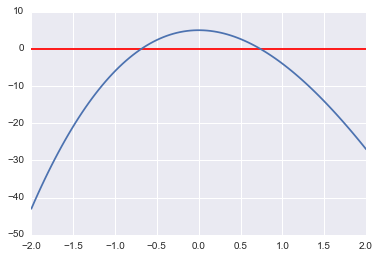

In [3]:
x_r = np.linspace(-2, 2, 100)
plt.axhline(0, color='r')
plt.plot(x_r, f(x_r));

Opazimo, da je ničla nekje blizu $x = 0.7$.

Inkrementalno reševanje temelji na ideji, da v kolikor imata $f(x_1)$ in $f(x_2)$ različne predznake, potem je vmes verjetno vsaj ena ničla. Zaprti interval $[x_1, x_2]$ razdelimo torej na odseke širine $\Delta x$; na odseku, kjer opazimo spremembo predznaka, je verjetno ničla.

Inkrementalna metoda ima nekatere slabosti:
* relativno počasna,
* mogoče je zgrešiti dve ničli, ki sta zelo blizu,
* večkratne ničle in lokalni ekstrem, ki se samo dotika abscise ne bo zaznan,
* poli funkcij so lahko napačno karakterizirani kot ničle\*

\* Poli pri $f(x)=\tan(x)$ bi bili napačno karakterizirani kot ničle; glejte sliko spodaj.

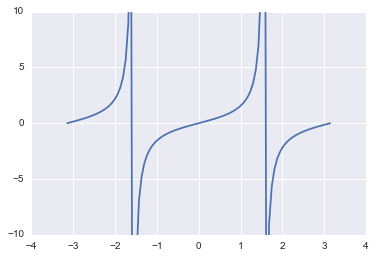

In [4]:
x_p = np.pi*np.linspace(-1, 1, 100)
plt.plot(x_p, np.tan(x_p));
plt.ylim(-10, 10);

Inkrementalna metoda spada med t.i. *zaprte* metode (ang. *bracketed*) saj išče ničlo samo na intervalu od $[x_1, x_2]$. Pozneje bomo spoznali tudi *odprte* metode, ki lahko konvergirajo k ničli zunaj podanega intervala.

## Numerična implementacija

Poglejmo si sedaj inkrementalno iskanje ničel:

In [6]:
def inkrementalna(fun, x1, x2, dx):
    """ Vrne interval (x1, x2) kjer verjetno leži ničla
    
    :param fun: funkcija katere ničle iščemo
    :param x1:  spodnja meja iskanja
    :param x2:  zgornja meja iskanja
    :param dx:  inkrement iskanja
    """
    x_d = np.arange(x1, x2, dx) # pripravimo x vrednosti
    f_d = np.sign(f(x_d))       # pripravimo predznake funkcije
    f_d = f_d[1:]*f_d[:-1]      # vektorsko odštejemo
    i = np.argmin(f_d)          # prvi prehod skozi ničlo
    return np.asarray([x_d[i], x_d[i+1]])

In [7]:
rez = inkrementalna(f, 0., 1., 0.001)
rez

array([ 0.734,  0.735])

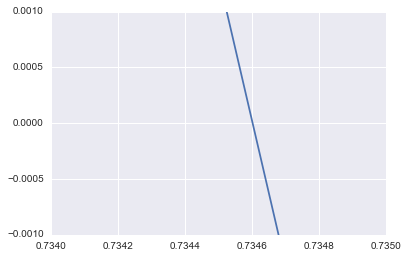

In [8]:
x_r = np.linspace(0, 1, 50)
plt.plot(x_r, f(x_r))
plt.plot(rez, f(rez), 'ro')
plt.xlim(rez)
plt.ylim(-0.001, 0.001);

Da smo torej na intervalu $[0, 1]$ zgoraj našli rezultat z natančnostjo $\Delta x=0.001$, smo morali 1000 krat klicati funkcijo $f(x)$. Za podobno natančnost lahko z malenkost bolj premišljenim pristopom bistveno zmanjšamo število klicev. 

### Iterativna inkrementalna metoda

Če v prvi iteraciji najprej z inkrementalno metodo omejimo interval iskanja ničle pri relativno velikem koraku, potem v naslednji iteraciji korak zmanjšamo in interval iskanja ničle omejimo na še ožje področje. Z iteracijami zaključimo, ko smo zadovoljni s širino najdenega intervala. Poglejmo si implementacijo:

In [9]:
def inkrementalna_super(fun, x1, x2, iteracij=3):
    """ Vrne interval (x1, x2) kjer verjetno leži ničla
    
    :param fun: funkcija katere ničle iščemo
    :param x1:  spodnja meja iskanja
    :param x2:  zgornja meja iskanja
    :iteraci:   število iteracij inkrementalne metode
    """
    for i in range(iteracij):
        dx = (x2 - x1)/10
        x1, x2 = inkrementalna(fun, x1, x2, dx)
    return np.asarray([x1, x2])

V 30 klicih funkcije $f(x)$ tako dobimo podobno natančnost kakor prej v 1000:

In [10]:
rez30 = inkrementalna_super(f, 0., 1., iteracij=3)
rez30

array([ 0.734,  0.735])

In [11]:
rez

array([ 0.734,  0.735])

Seveda pa lahko natančnost bistveno izboljšamo z večanjem števila iteracij:

In [12]:
rez80 = inkrementalna_super(f, 0., 1., iteracij=8)
rez80

array([ 0.7346035 ,  0.73460351])

# 3. Bisekcijska metoda

Na intervalu $[x_1, x_2]$ kjer vemo, da obstaja ničla (predznaka $f(x_1)$ in $f(x_2)$ se razlikujeta) lahko uporabimo različne metode določitve ničle. Ena od bolj preprostih je *bisekcijska metoda*; osnovna ideja je relativno enostavna:
* interval $[x_1, x_2]$ razdelimo na pol: $x_3 = (x_1+x_2)/2$,
* če imata $f(x_1)$ in $f(x_3)$ različne predznake, potem vemo, da je novi interval ničle $[x_1, x_3]$, sicer pa: $[x_3, x_2]$,
* glede na predhodni korak definiramo novi zaprti interval $[x_1, x_2]$ in nadaljujemo z iterativnim postopkom, dokler ne dosežemo željene natančnosti $\varepsilon=|x_2-x_1|$.

Bisekcijska metoda spada med *zaprte* metode, ki vrne ničlo na podanem intervalu $[x_1, x_2]$ (seveda morata biti predznaka $f(x_1)$ in $f(x_2)$ različna.

#### Konvergenca

Če v začetku začnemo z intervalom $\Delta x = |x_2-x_1|$, potem je natančnost bisekcijske metode po prvem koraku bisekcije $\varepsilon = \Delta x/2$, po drugem koraku: $\varepsilon = \Delta x/2^2$ in po $n$ korakih $\varepsilon = \Delta x/2^n$. 

Ponavadi imamo zahtevo po končni natančnosti $\varepsilon$ in iz zgornje enačbe lahko izpeljemo število potrebnih korakov:
$$n = \frac{\log\left(\frac{\Delta x}{\varepsilon}\right)}{\log(2)}.$$
Seveda je število korakov na koncu celo število.

## Numerična implementacija

In [13]:
def bisekcija(fun, x1, x2, tol=1e-3, izpis=True):
    """ Vrne ničlo z natančnostjo tol
    
    :param fun: funkcija katere ničle iščemo
    :param x1:  spodnja meja iskanja
    :param x2:  zgornja meja iskanja
    :param tol: zahtevana natančnost
    :izpis:     ali na koncu izpiše kratko poročilo
    """
    n = np.ceil( np.log(np.abs(x2-x1)/tol)/np.log(2) ).astype(int) # števil iteracij
    for i in range(n):
        x3 = (x1 + x2) / 2
        if np.sign(fun(x3))!=np.sign(fun(x1)):
            x2 = x3
        else:
            x1 = x3
    if izpis:
        print('Število iteracij: {:g}'.format(n))
    return (x1+x2)/2

In [14]:
bisekcija(f, 0, 1, tol=1e-3)

Število iteracij: 10


In [15]:
rez30

array([ 0.734,  0.735])

Dodamo lahko še nekaj kontrole napak:

In [15]:
def bisekcija(fun, x1, x2, tol=1e-3, izpis=True):
    """ Vrne ničlo z natančnostjo tol
    
    :param fun: funkcija katere ničle iščemo
    :param x1:  spodnja meja iskanja
    :param x2:  zgornja meja iskanja
    :param tol: zahtevana natančnost
    :izpis:     ali na koncu izpiše kratko poročilo
    """
    if np.sign(fun(x1))==np.sign(fun(x2)):
        raise Exception('Ničla ni izolirana. Root is not bracketed.')
    n = np.ceil( np.log(np.abs(x2-x1)/tol)/np.log(2) ).astype(int) # števil iteracij
    for i in range(n):
        x3 = (x1 + x2) / 2
        f1 = fun(x1)
        f3 = fun(x3)
        f2 = fun(x2)
        if np.abs(f3) > np.abs(f1) and np.abs(f3) > np.abs(f2):
            raise Exception('Bisekcija ne konvergira, verjetnost pola.')
        if np.sign(fun(x3))!=np.sign(fun(x1)):
            x2 = x3
        else:
            x1 = x3
    if izpis:
        print('Število iteracij: {:g}'.format(n))
    return (x1+x2)/2

In [16]:
%%timeit
bisekcija(f, 0., 1., izpis=False)

10000 loops, best of 3: 97.6 µs per loop


In [17]:
bisekcija(f, 0., 1., izpis=True)

Število iteracij: 10


Poglejmo sedaj iskanje ničel funkcije ``tan``:

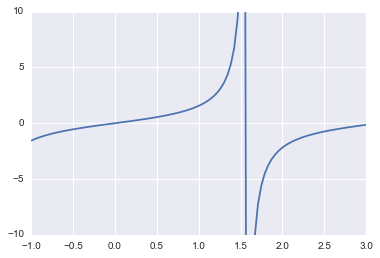

In [18]:
x_p = np.linspace(-1, 3, 100)
plt.plot(x_p, np.tan(x_p));
plt.ylim(-10, 10);

In [19]:
bisekcija(np.tan, -1, 1, tol=1e-6)

Število iteracij: 21


In [20]:
bisekcija(np.tan, 1, 2, tol=1e-3)

Exception: Bisekcija ne konvergira, verjetnost pola.

### Uporaba ``scipy.optimize.bisect``

Bisekcijska metoda je *počasna* vendar zanesljiva metoda iskanja ničel in je implementirana znotraj ``scipy``:

In [21]:
from scipy import optimize

Poglejmo najprej hitrost:

In [22]:
%%timeit
optimize.bisect(f, 0, 1, xtol=1e-3)

The slowest run took 5.59 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 10.9 µs per loop


In [23]:
optimize.bisect(f, 0, 1, xtol=1e-3)

Ugotovimo, da je ``scipy`` implementacija približno 10-krat hitrejša od zgoraj predstavljene.

Poglejmo si še iskanje funkcije $\tan()$:

In [24]:
optimize.bisect(np.tan, -1, 1)

Pr tem je potrebno biti previden, saj funkcija zahteva zvezno funkcijo ($\tan()$ v polu ni zvezna) in zato lahko dobimo napačno rešitev (*naša* implementacija, definirana zgoraj takšno rešitev ne dovoli):

In [25]:
optimize.bisect(np.tan, 1, 2)

# 4. Sekantna metoda

Na sliki spodaj (vir: Jaan Kiusalaas, Numerical Methods in Engineering With Python 3, 3rd Ed) je prikazana funkcija $f$ v okolici ničle. 
<img src='./fig/sekantna_metoda.png' width=250>
Sekantna metoda rabi dve začetni vrednosti $x_1$ in $x_2$. Ob predpostavki linearne interpolacije med točkama 1 in 2, se lahko določi točka 3, kjer ima linearna funkcija ničlo.

Glede na sliko lahko zapišemo (podobni trikotniki):
$$\frac{f(x_2)}{x_3 − x_2}= \frac{f(x_1) − f(x_2)}{x_2 − x_1}.$$
Sledi, da je novi približek ničle:
$$x_3= x_2+f(x_2)\,\frac{x_2 − x_1}{f(x_1) − f(x_2)}.$$


V naslednjem koraku pri sekantni metodi izvedmo sledeče zamenjave $x_1=x_2$ in $x_2=x_3$ (sekantna metoda ne zahteva, da je ničla izolirana).

Sekantna metoda spada med *odprte* metode, saj lahko najde ničlo, ki se nahaja zunaj območja $[x_1, x_2]$.

### Konvergenca in red konvergence

Tukaj konvergence ne moremo natančno oceniti, lahko pa ocenimo **red konvergence**.

Če z $\varepsilon$ označimo napako metode in če bi z vsakim korakom iteracije napako linearno zmanjševali, bi to zapisali:
$$\varepsilon_n = C\,\varepsilon_{n-1},$$
kjer bi bila $C$ konstanta. Pri predhodno obravnavani bisekcijski metodi, napako na vsakem koraku zmanjšamo za $1/2$ ($\varepsilon_n/\varepsilon_{n-1} = C = 1/2$). *Bisekcijska metoda ima red konvergence 1.* 

V nasprotju s bisekcijsko metodo, pa je red konvergence *sekantne metode boljši* (t.i. *superlinearna*), literatura navaja vrednost: 
$$\varepsilon_n = C\,\varepsilon_{n-1}^{1.618}.$$

Še boljšo (kvadratično) konvergenco ima t.i. *Ridderjeva* metoda. Ridderjeva metoda je zaprtega tipa in je sorodna sekantni metodi, vendar si je tukaj ne bomo podrobno ogledali. 

### Numerična implementacija

In [26]:
def sekantna(fun, x1, x2, tol=1e-3, max_iter=50, izpis=True):
    """ Vrne ničlo z natančnostjo tol
    
    :param fun: funkcija katere ničle iščemo
    :param x1:  spodnja meja iskanja
    :param x2:  zgornja meja iskanja
    :param tol: zahtevana natančnost
    :max_iter:  maksimalno število iteracij preden se izvajanje prekine
    :izpis:     ali na koncu izpiše kratko poročilo
    """
    for i in range(max_iter):
        f1 = fun(x1)
        f2 = fun(x2)
        x3 = x2 + f2 * (x2 - x1)/(f1 - f2)
        x1 = x2
        x2 = x3
        if np.abs(x2-x1)<tol:
            if izpis:
                print('Število iteracij: {:g}'.format(i))
            return (x1+x2)/2
    raise Exception('Metoda po {:g} iteracijah ne konvergira'.format(max_iter))

In [27]:
sekantna(f, 0, 1., tol=1.e-3)

Število iteracij: 4


In [28]:
%%timeit
sekantna(f, 0, 1., tol=1.e-8, izpis=False)

10000 loops, best of 3: 18.8 µs per loop


Poglejmo si primer, ko bo rešitev zunaj podanega intervala:

In [29]:
sekantna(np.tan, 1, 2)

Število iteracij: 10


### Uporaba ``scipy.optimize.newton``

Znotraj ``scipy`` je sekantna metoda definirana v okviru ``scipy.optimize.newton`` funkcije; če namreč ne podamo funkcije, ki definira prvi odvod, potem je uporabljena sekantna metoda (glejte pomoč).

In [30]:
%%timeit
optimize.newton(f, 0.1)

10000 loops, best of 3: 16.3 µs per loop


In [31]:
%%timeit
optimize.ridder(f, 0, 1)

100000 loops, best of 3: 12.3 µs per loop


Poglejmo še Ridderjevo metodo na primeru pola funkcije $\tan()$:

In [32]:
optimize.ridder(np.tan, 1, 2)

# 5. Newton-Raphsonova metoda

Newton-Raphsonova (tudi poimenovana tangentna) metoda se smatra za morebiti najboljšo metodo iskanja ničel. Rabi samo eno začetno vrednost, je hitra in preprosta; vendar pa ima eno slabost: zahteva odvod funkcije $f'(x)$.

Poglejmo si podrobnosti: vrednost funkcije $f(x_{i+1})$ določimo s pomočjo Taylorjeve vrste glede na lego $x_i$:
$$f(x_{i+1})=f(x_i)+f'(x_i)\,\left(x_{i+1}-x_i\right)+O^2\left(x_{i+1}-x_i\right),$$
če naj bo pri $x_{i+1}$ vrednost funkcije nič, potem velja:
$$0=f(x_i)+f'(x_i)\,\left(x_{i+1}-x_i\right)+O^2\left(x_{i+1}-x_i\right).$$
Če zanemarimo višje rede Taylorjeve vrste, potem lahko izpeljemo:
$$x_{i+1}=x_i-\frac{f(x_i)}{f'(x_i)}.$$

Zgornje izvajanje lahko prikažemo tudi na sliki (vir: Jaan Kiusalaas, Numerical Methods in Engineering With Python 3, 3rd Ed):
<img src="./fig/newton-raphson.png" width=250>

*Newton-Raphsonova* metoda ponavlja zgornji pristop dokler ni izpolnjen pogoj:
$$|x_{i+1}-x_i|<\varepsilon$$

### Omejitve Newton-Raphsonove metode

Zgoraj smo omenili, da je metoda ena izmed boljših in tudi najbolj pogosto uporabljenih metod za iskanje ničel. Ima pa tudi nekaj slabosti/omejitev:
* spada med *odprte* metode, 
* konvergenca je zagotovljena le v dovolj majhni okolici rešitve, sicer rešitev divergira ali konvergira proti kakšni drugi rešitvi,
* treba je poznati odvod funkcije (alternativa je numerični odvod funkcije ali bolje uporaba sekantne metode).

### Red konvegence

Red konvergence Newton-Raphsonove metode je kvadratičen: 
$$\varepsilon_n = C\,\varepsilon_{n-1}^{2},$$
kjer je konstanta:
$$C=-\frac{f''(x)}{2\,f'(x)}$$
Konvergenca Newton-Raphsonove metode je torej hitra; vendar pa to velja lokalno, ko smo enkrat relativno blizu ničle. Kadar smo pa relativno daleč, pa bi za ustrezeno aproksimacino s Taylorjevo vrsto potrebovali tudi višje člene (bomo videli spodaj, da ``scipy`` implementacija omogoča dodajanje tudi drugega odvoda).

### Numerična implementacija

In [33]:
def newton_raphson(fun, dfun, x0, tol=1e-3, max_iter=50, izpis=True):
    """ Vrne ničlo z natančnostjo tol
    
    :param fun:  funkcija katere ničle iščemo
    :param dfun: f'
    :param x0:   začetni približek
    :param tol:  zahtevana natančnost
    :max_iter:  maksimalno število iteracij preden se izvajanje prekine
    :izpis:     ali na koncu izpiše kratko poročilo
    """
    for i in range(max_iter):
        x1 = x0 - fun(x0)/dfun(x0)
        if np.abs(x1-x0)<tol:
            if izpis:
                print('Število iteracij: {:g}'.format(i))
            return x1
        x0 = x1
    raise Exception('Metoda po {:g} iteracijah ne konvergira'.format(max_iter))

In [16]:
??f

In [35]:
def df(x):
    return 3*x**2 - 20*x
def ddf(x):
    return 6*x - 20

In [36]:
newton_raphson(f, df, 1, tol=1e-6)

Število iteracij: 3


In [37]:
%%timeit
newton_raphson(f, df, 1, tol=1.5e-8, izpis=False)

100000 loops, best of 3: 13 µs per loop


## Uporaba ``scipy.optimize.newton``

In [38]:
%%timeit
optimize.newton(f, 1, df)

100000 loops, best of 3: 10.1 µs per loop


Dodajo še drugi odvod

In [39]:
optimize.newton(f, 1, df, fprime2=ddf)

In [40]:
%%timeit
optimize.newton(f, 1, df, fprime2=ddf)

10000 loops, best of 3: 20 µs per loop


Poglejmo še funkcijo $\tan()$

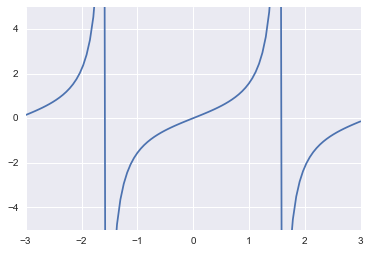

In [41]:
x_r = np.linspace(-3, 3, 100)
plt.plot(x_r, np.tan(x_r));
plt.ylim(-5, 5);

In [42]:
X = sym.symbols('X')

sym.diff(sym.tan(X),X)

In [43]:
dtan = lambda x: np.tan(x)**2 + 1
optimize.newton(np.tan, 2, dtan)

# 6. Iskanje ničel sistema enačb

Tukaj bomo sedaj iskanje ničel posplošili na problem:
$$\mathbf{f}(\mathbf{x})=\mathbf{0},$$
kar lahko zapišemo tudi v skalarni obliki:
$$\begin{array}{rcl}
f_1(x_1,x_2,\dots, x_n)&=&0\\
f_2(x_1,x_2,\dots, x_n)&=&0\\
&\vdots&\\
f_n(x_1,x_2,\dots, x_n)&=&0\\
\end{array}$$

Sočasno iskanje ničle $n$ funkcij je bistveno bolj zahtevno kakor reševanje ene same enačbe; ker je vsaka enačba zase lahko nelinearna, ima sistem takih enačb lahko več ničel in katero najdemo, je odvisno od začetnih pogojev. Ponavadi nam pri dobri izbiri začetnih pogojev pomaga fizikalni problem, ki ga rešujemo.

Tudi za iskanje ničel sistema se *Newton-Raphsonova* metoda izkaže kot najenostavneša in pogosto tudi najboljša (obstajajo druge metode, ki pa so ponavadi variacija Newton-Raphsonove).

Poglejmo si teoretično ozadje. Podobno kakor pri skalarnem problemu, tudi tukaj začnemo z razvojem Taylorjeve vrste za $i$-to funkcijo:
$$f_i(\mathbf{x}+\Delta \mathbf{x})=f_i(\mathbf{x})+\sum_{j=1}^n \frac{\partial f_i}{\partial x_j}\,\Delta x_j+O^2(\mathbf{x}).$$
Potem, ko člene reda 2 in višje zanemarimo, lahko zapišemo izraz v matrični obliki:
$$\mathbf{f}(\mathbf{x}+\Delta \mathbf{x})=\mathbf{f}(\mathbf{x})+\mathbf{J}(\mathbf{x})\,\Delta \mathbf{x},$$
kjer je $\mathbf{J}(\mathbf{x})$ *Jakobijeva* matrika pri vrednostih $\mathbf{x}$. Elementi Jakobijeve matrike so: 
$$J_{ij}=\frac{\partial f_i}{\partial x_j}.$$

Če naj pri $\mathbf{x}+\Delta \mathbf{x}$ najdemo ničlo, potem mora veljati:
$$\mathbf{0}=\mathbf{f}(\mathbf{x})+\mathbf{J}(\mathbf{x})\,\Delta \mathbf{x}$$
in torej sledi:
$$\underbrace{\mathbf{J}(\mathbf{x})}_{\mathbf{A}}\,\underbrace{\Delta \mathbf{x}}_{\mathbf{x}}=\underbrace{\mathbf{f}(\mathbf{x})}_{\mathbf{b}}$$
Opazimo, da smo izpeljali sistem linearnih enačb ($\mathbf{A}\,\mathbf{x}=\mathbf{b}$), kjer je vektor neznank $\Delta\mathbf{x}$.

Opomba: analitično definiranje Jakobijeve matrike je lahko zamudno in zato jo pogosto izračunamo kar numerično:
$$\frac{\partial f_i}{\partial x_j}\approx
\frac{f_i(\mathbf{x}+\mathbf{e}_j\,h)-f_i(\mathbf{x})}{h},$$
kjer je $h$ majhen premik in je $\mathbf{e}_j$ enotski pomik v smeri $x_j$.

## Numerična implementacija

Najtežji del je pridobiti Jacobijevo matriko:
* simbolno jo si lahko pomagamo s funkcijo ``jacobian`` v okviru ``sympy``
* numerično si lahko pomagamo s funkcijo ``approx_fprime``, ki se nahaja v ``scipy.optimize``.

Ko imamo enkrat Jakobijevo matriko definirano, moramo rešiti sistem linearnih enačb in tako pridobimo novi približek $\mathbf{x}$. Z iteriranjem nadaljujemo dokler ne dosežemo zahtevane konvergence.

Tukaj metode numerično ne bomo implementirali, ampak si bomo pogledali kako ničle sistema iščemo znotraj ``scipy`` paketa.

## Uporaba ``scipy.optimize.root``

Definirajmo najprej funkcijo več spremenljivk:

In [44]:
def func(x):
    return [x[0]**3 + x[1] -2, x[1]**2 - 4]

In [45]:
optimize.root(func, [2, -1])

    nfev: 12
     fun: array([  9.13935594e-13,  -7.99360578e-15])
  status: 1
 message: 'The solution converged.'
 success: True
       r: array([-7.55643203, -1.16087829,  4.00142094])
     qtf: array([  1.45109458e-08,  -1.24690325e-10])
       x: array([ 1.58740105, -2.        ])
    fjac: array([[ -1.00000000e+00,  -3.60054157e-06],
       [  3.60054157e-06,  -1.00000000e+00]])

## Uporaba ``sympy.solve``

Za manjše sistem lahko rešitev najdemo tudi simbolno. Poglejmo si zgornji primer:

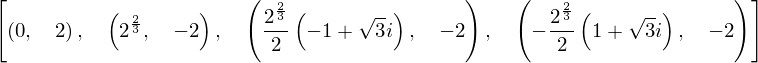

In [46]:
x, y = sym.symbols('x, y')
sol = sym.solve([x**3 + y -2, y**2 - 4], x, y)
sol

# Do naslednjih vaj preštudirajte sledeče:

1. V simbolni obliki definirajte izraz:
$$f(x) = x^4 - 6.4\,x^3 + 6.45\,x^2 + 20.538\,x - 31.752.$$
* Narišite funkcijo $f(x)$. Koliko ničel pričakujemo za funkcijo $f(x)$.?
* V simbolni obliki določite ničle polinoma $f(x)$.
* Kako preverimo ali je ničla ekstrem?
* Numerično najdite vse ničle z bisekcijsko metodo (uporabite ``scipy``).
* Numerično najdite vse ničle z sekantno metodo (uporabite ``scipy``).
* Numerično najdite vse ničle z Newton-Raphsonovo metodo (uporabite ``scipy``).
* Podatke:
    $$x=[0, 1, 2, 3, 4, 5]$$
    $$y=[0.95, 0.93, 0.87, 0.77, 0.64, 0.49]$$
  aproksimirajte s funkcijo $\cos(a\,x)$ (z uporabo ``scipy.optimize.curve_fit`` določite konstanto $a$).
* Na intervalu $x=[0, 50]$ z bisekcijsko metodo poiščite vse ničle najdene funkcije $\cos(a\,x)$.
* Na intervalu $x=[0, 50]$ z Newton-Raphsonovo metodo poiščite vse ničle najdene funkcije $A\,\cos(a\,x)$.
* S pomočjo ``sympy`` najdite simbolno rešitev za:
$$x^2 + y -2=0\qquad\textrm{in}\qquad  y^2 - 4=0.$$
* Zgoraj definirani problem rešite še numerično s pomočjo ``scipy.optimize.root``.
* Na predhodnem vprašanju preizkusite različne metode (glejte pomoč).
* Z uporabo bisekcijske metode dimenzionirajte prikazani upogibno obremenjeni nosilec dolžine $L$ (obremenjen s točkovno silo $F$). Določite velikost polnega krožnega prereza $d$.
<img src="./fig/nal-num_iskanje_nicel-1.jpg">
    $F = 1 \mathrm{kN}$
    
    $L = 1 \mathrm{m}$<br>
    $\sigma_{dop} = 120 \mathrm{MPa}$
    
    Reševanje: 
    
    $\sigma_u \leq \sigma_{dop} \to \frac{F\,L}{W} = \frac{F\,L\,32}{\pi\,d^3} = \sigma_{dop}$

Delno rešene vaje se nahajajo [tukaj](./vaje/Vaja 9 - polovica.ipynb).

# Ekstra

Tisti, ki ste navdušeni na [Raspberry Pi](https://www.raspberrypi.org/) in uporabljate njihovo kamero (npr. [tole brez infra-rdečega filtra](https://www.raspberrypi.org/products/pi-noir-camera/)) vas bo morebiti zanimala knjižnica [picamera](http://picamera.readthedocs.org/)